# Começando o circuito

In [2]:
# Primeiro passo é sempre importar o Qiskit

from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
%matplotlib inline

# Porta CNOT (CX) - 2 Qbits

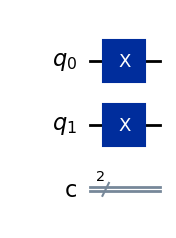

In [4]:
Qr = QuantumRegister(2, 'q')
Cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(Qr, Cr) #criando o circuito
circuit.x(Qr[0]) 
circuit.x(Qr[1]) #resetar esse qubit
circuit.draw(output = 'mpl')

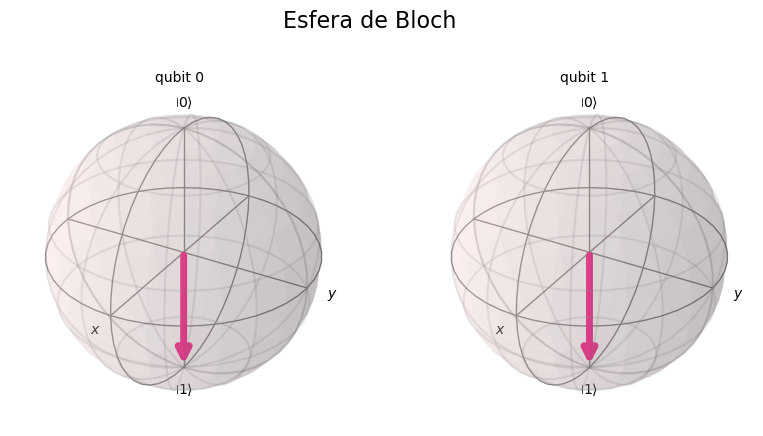

In [5]:
from qiskit.quantum_info import DensityMatrix

matrix = DensityMatrix(circuit)
plot_bloch_multivector(matrix, title='Esfera de Bloch', reverse_bits=False)

$|q_0>\otimes|q_1>$ = $|1>\otimes|1>$

CNOT $|q_0>\otimes|q_1>$ = $|1>\otimes|0>$

onde $CNOT = \begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
\end{pmatrix}$

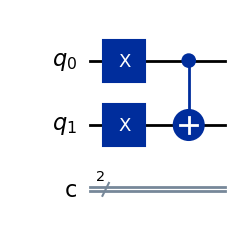

In [6]:
circuit.cx(Qr[0],Qr[1])
circuit.draw(output = 'mpl')

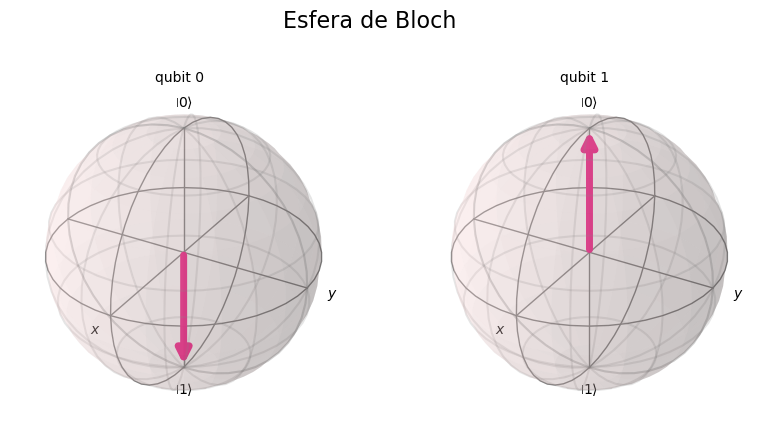

In [7]:
from qiskit.quantum_info import DensityMatrix

matrix = DensityMatrix(circuit)
plot_bloch_multivector(matrix, title='Esfera de Bloch', reverse_bits=False)

# Realizando Medidas

In [8]:
circuit.measure(Qr, Cr)

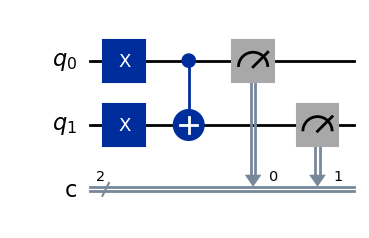

In [9]:
circuit.draw(output = 'mpl')

# Simulando Seus Resultados

## Importando os pacotes necessários

In [24]:
# Vamos simular o circuito em um computador doméstico e quantico;

from qiskit_aer import * #IMPORTANTE: instalar qiskit_aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np

## Vamos Executar o algoritmo em nosso computador?

In [28]:
simulador = Aer.get_backend('statevector_simulator') #selecionando o simulador no nosso computador doméstico

pm = generate_preset_pass_manager(optimization_level=0, backend=simulador)

transpile = pm.run(circuit)

counts = simulador.run(transpile, shots=1024).result().get_counts()

# Plotando Seus Resultados

In [29]:
from qiskit.visualization import plot_histogram

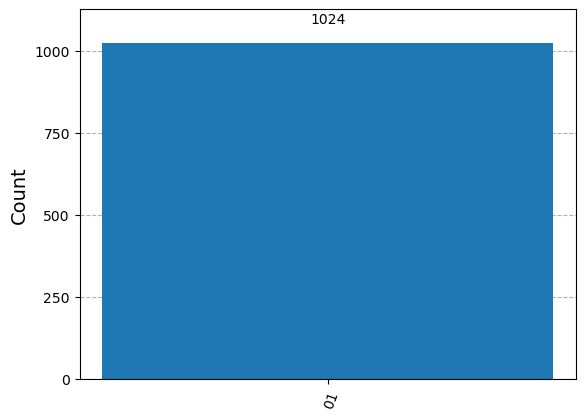

In [31]:
plot_histogram(counts)

## Executando o Algoritmo em um computador quantico real:

In [33]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [34]:
# Para acessar o canal da IBM cloud
service = QiskitRuntimeService(channel="ibm_cloud")
 
# Para acessar as credenciais previamente salvas para o canal da IBM quantum
service = QiskitRuntimeService(channel="ibm_quantum")

In [35]:
#checar as Credenciais
print(service.instances())


['ibm-q/open/main']


In [36]:
#Selecionar o computador Quântico
service = QiskitRuntimeService(channel="ibm_quantum", instance="ibm-q/open/main")
comput = service.backend("ibm_sherbrooke", instance="ibm-q/open/main")


/tmp/ipykernel_612/2461589469.py:5: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  counts = comput.run(transpile, shots=1024).result().get_counts()


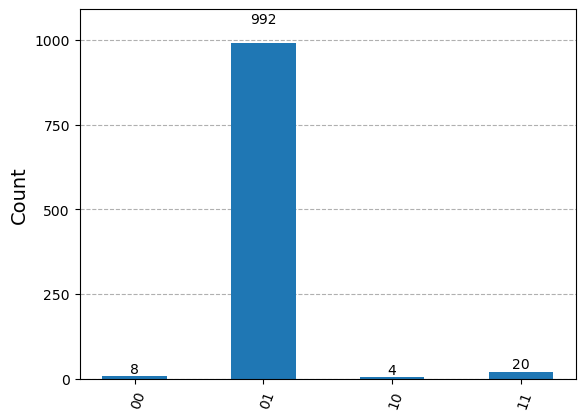

In [37]:
pm = generate_preset_pass_manager(optimization_level=0, backend=comput)

transpile = pm.run(circuit)

counts = comput.run(transpile, shots=1024).result().get_counts()

plot_histogram(counts)

# Exemplo: Teletransporte Quântico

<img src="circuito2.png">

In [1]:
from qiskit import *
from qiskit_aer import * #instalar qiskit_aer
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector
%matplotlib inline

## Passo 1: Criando o Circuito

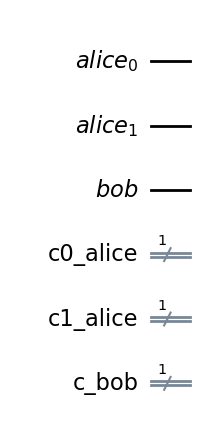

In [3]:
Alice = QuantumRegister(2, 'alice')
Cra0 = ClassicalRegister(1, 'c0_alice')
Cra1 = ClassicalRegister(1, 'c1_alice')
Bob = QuantumRegister(1, 'bob')
Crb = ClassicalRegister(1, 'c_bob')

circuito = QuantumCircuit(Alice,Bob,Cra0,Cra1,Crb) #criando o circuito

circuito.draw(output = 'mpl')

## Passo 2: Preparando o Estado $\vert \psi \rangle$ que será teleportado

$\vert \psi \rangle = \vert + \rangle$

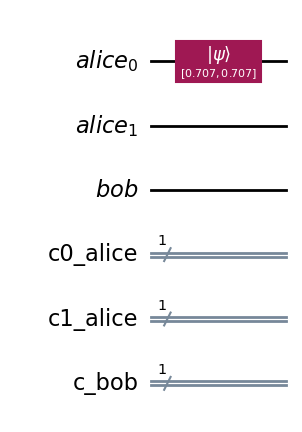

In [4]:
estado_inicial = [np.sqrt(1/2),np.sqrt(1/2)]
circuito.initialize(estado_inicial,Alice[0])
circuito.draw(output = 'mpl')

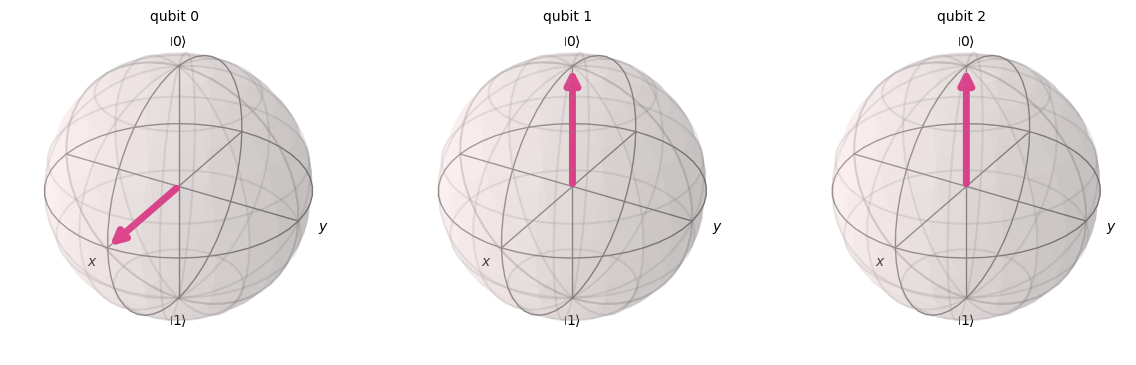

In [6]:
state = Statevector(circuito)
plot_bloch_multivector(state)

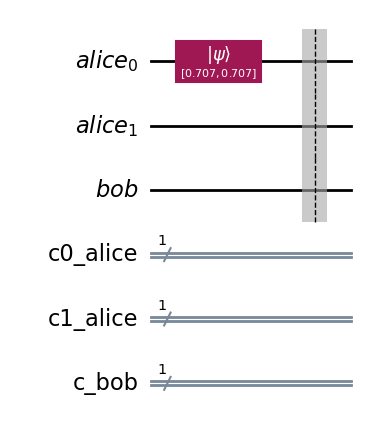

In [7]:
circuito.barrier() # apenas uma ajuda para facilitar a visualização
circuito.draw(output = 'mpl')

## Passo 3: Emaranhando os Qbits 1 e 2

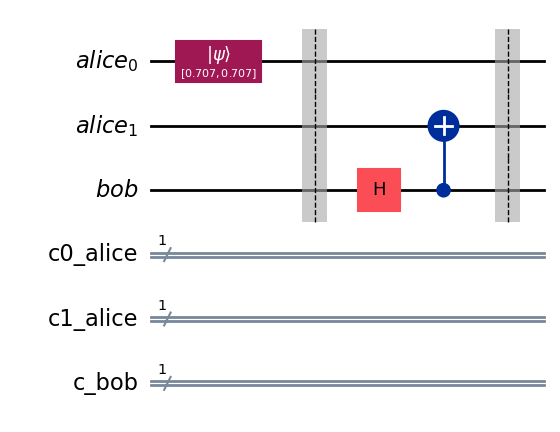

In [8]:
circuito.h(Bob[0])
circuito.cx(Bob[0],Alice[1])
circuito.barrier() # apenas uma ajuda visual
circuito.draw(output = 'mpl')

## Passo 4: Alice aplica uma série de operações em seu laboratório

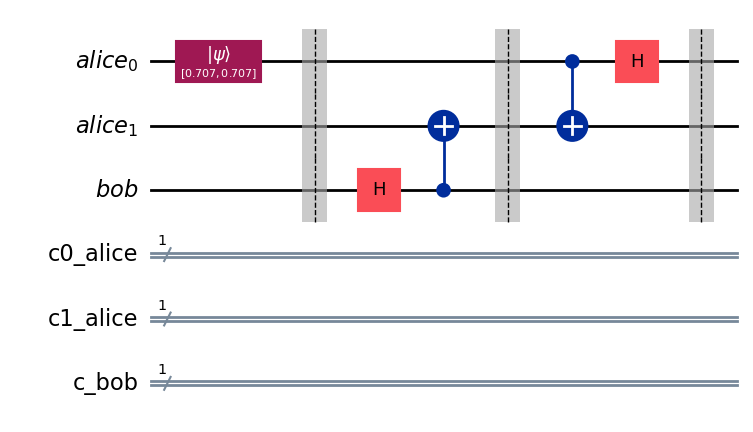

In [9]:
circuito.cx(Alice[0],Alice[1])
circuito.h(Alice[0])
circuito.barrier() # apenas uma ajuda visual
circuito.draw(output = 'mpl')

## Passo 5: 
### Agora  Alice medw seus dois qubits (seus estados serão colapsados).
### Bob precisa fazer operações condicionadas a esses qubits na sua metade do par emaranhado
### Enquanto condicionamos a operação de Bob nos qubits recolhidos 0 e 1, podemos fazer o teleporte a longas distâncias transmitindo as informações clássicas nos bits clássicos 0 e 1

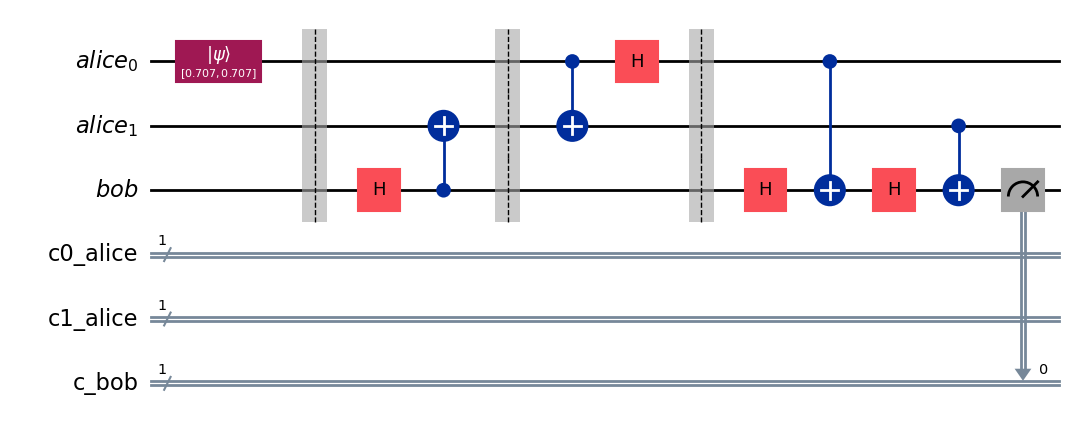

In [11]:
circuito.h(Bob[0])
circuito.cx(Alice[0], Bob[0])
circuito.h(Bob[0])
circuito.cx(Alice[1], Bob[0])
circuito.measure(Bob, Crb)

circuito.draw(output = 'mpl')

# Vamos Executar o Teleporte?

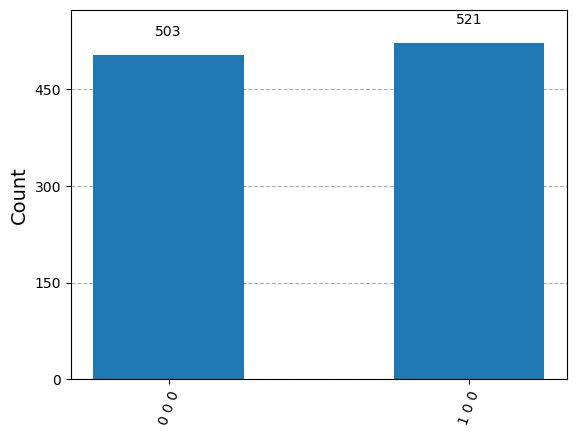

In [13]:
simulador = Aer.get_backend('statevector_simulator') 

pm = generate_preset_pass_manager(optimization_level=0, backend=simulador)

transpile = pm.run(circuito)

counts = simulador.run(transpile, shots=1024).result().get_counts()

plot_histogram(counts)

$|alice>\otimes |bob>$ = $|00>\otimes\frac{1}{\sqrt{2}}\left(|0> + |1>\right)$

# Vamos fazer isso em um computador quântico real?

In [16]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(channel="ibm_cloud")
service = QiskitRuntimeService(channel="ibm_quantum")
print(service.instances())

['ibm-q/open/main']


/tmp/ipykernel_516/3413208797.py:7: DeprecationWarning: backend.run() and related sessions methods are deprecated  as of qiskit-ibm-runtime 0.23 and will be removed no sooner than 6 months after the release date. More details can be found in the primitives migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime.
  counts = comput.run(transpile, shots=1024).result().get_counts()


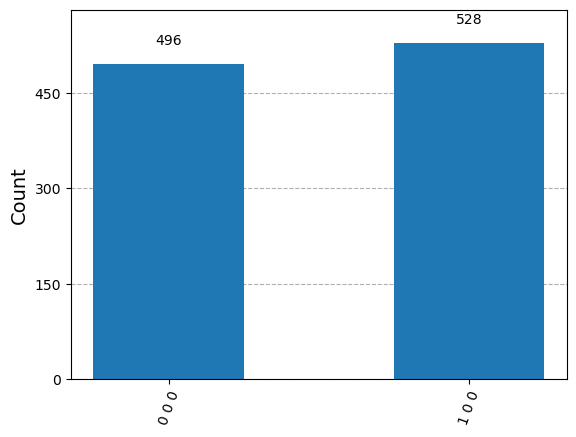

In [17]:
service = QiskitRuntimeService(channel="ibm_quantum", instance="ibm-q/open/main")
comput = service.backend("ibm_sherbrooke", instance="ibm-q/open/main")
pm = generate_preset_pass_manager(optimization_level=0, backend=comput)

transpile = pm.run(circuito)

counts = comput.run(transpile, shots=1024).result().get_counts()

plot_histogram(counts)

# Exercícios:

1. Aplique as portas Y e Z em cada qbit da base computacional $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$. Mostre cada resultado na Esfera de Bloch e Plote as distribuições de probabilidade e comente o resultados. (b) Aplique as Porta X, Y e Z no estado  $\vert + \rangle=\frac{1}{\sqrt{2}}\left(\vert 0 \rangle + \vert 1 \rangle\right)$, mostre o estado na esfera de Bloch antes e depois da Aplicação da Porta, mostre a distribuição do resultado e comente o resultado de cada porta. 


2. (a) Aplique a Porta Hadamard no qbit $\vert 1 \rangle$. (b) Mostre na esfera de Bloch que o resultado será o vetor $\vert - \rangle=\frac{1}{\sqrt{2}}\left(\vert 0 \rangle - \vert 1 \rangle\right)$. (c) Plote a distribuição de probablilidade de estados.

3. O que acontece se aplicamos a porta Hadamard duas vezes seguidas nos estados da base computacional  $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$? Comente o Resultado.

4. Utilizando as Portas Hadamard e Z mostre que a sequência de portas HZH equivale a aplicação da porta X nos estados $\lbrace  \vert 0 \rangle,  \vert 1 \rangle \rbrace$. Mostre cada resultado na Esfera de Bloch e Plote as distribuições de probabilidade e comente o resultados.

5. Execute o Teleporte do estado 
$\vert \psi \rangle = \sqrt{\frac{1}{3}}\vert 0 \rangle + \sqrt{\frac{2}{3}}\vert 1 \rangle$
em um computador quântico real